# Model the Price of the houses


PROBLEM: estimate the price of the houses, based on some features of the houses.

The dataset USA_Housing.csv contains the information.

The data contains the following columns:

* <b>'Avg. Area Income'</b>: Avg. Income of residents of the city house is located in.
* <b>'Avg. Area House Age'</b>: Avg Age of Houses in same city
* <b>'Avg. Area Number of Rooms'</b>: Avg Number of Rooms for Houses in same city
* <b>'Avg. Area Number of Bedrooms'</b>: Avg Number of Bedrooms for Houses in same city
* <b>'Area Population'</b>: Population of city house is located in
* <b>'Price'</b>: Price that the house sold at
* <b>'Address'</b>: Address for the house

## Get the data
We've been able to get some data from your neighbor for housing prices as a csv set, let's get our environment ready with the libraries we'll need and then import the data!
### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### See the head of the data

In [3]:
housing_df = pd.read_csv('USA_Housing.csv')

In [4]:
housing_df.shape

(5000, 7)

In [5]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       4991 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,4991.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987589,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.006161,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.298437,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002940,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.666100,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

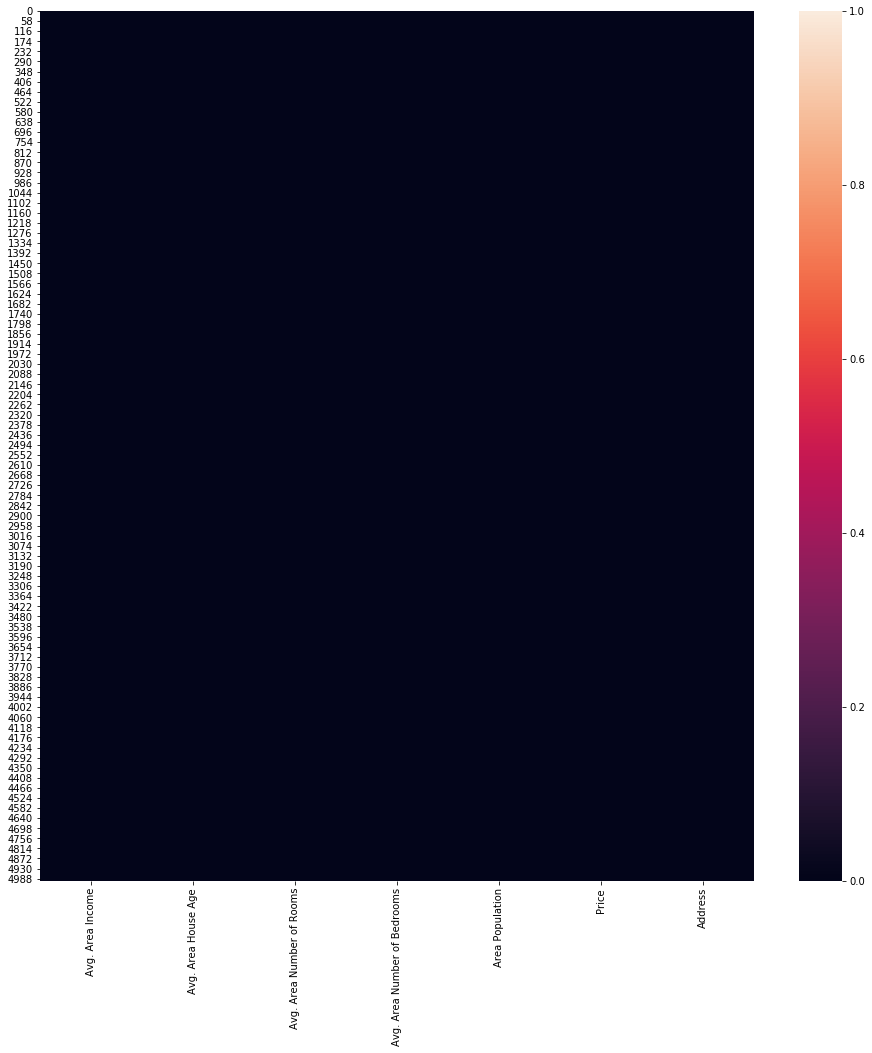

In [8]:
plt.figure(figsize=(16, 16))
sns.heatmap(housing_df.isnull())

In [10]:
housing_df.isnull().sum(axis=0)

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       9
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# EDA

Let's create some simple plots to check out the data!

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


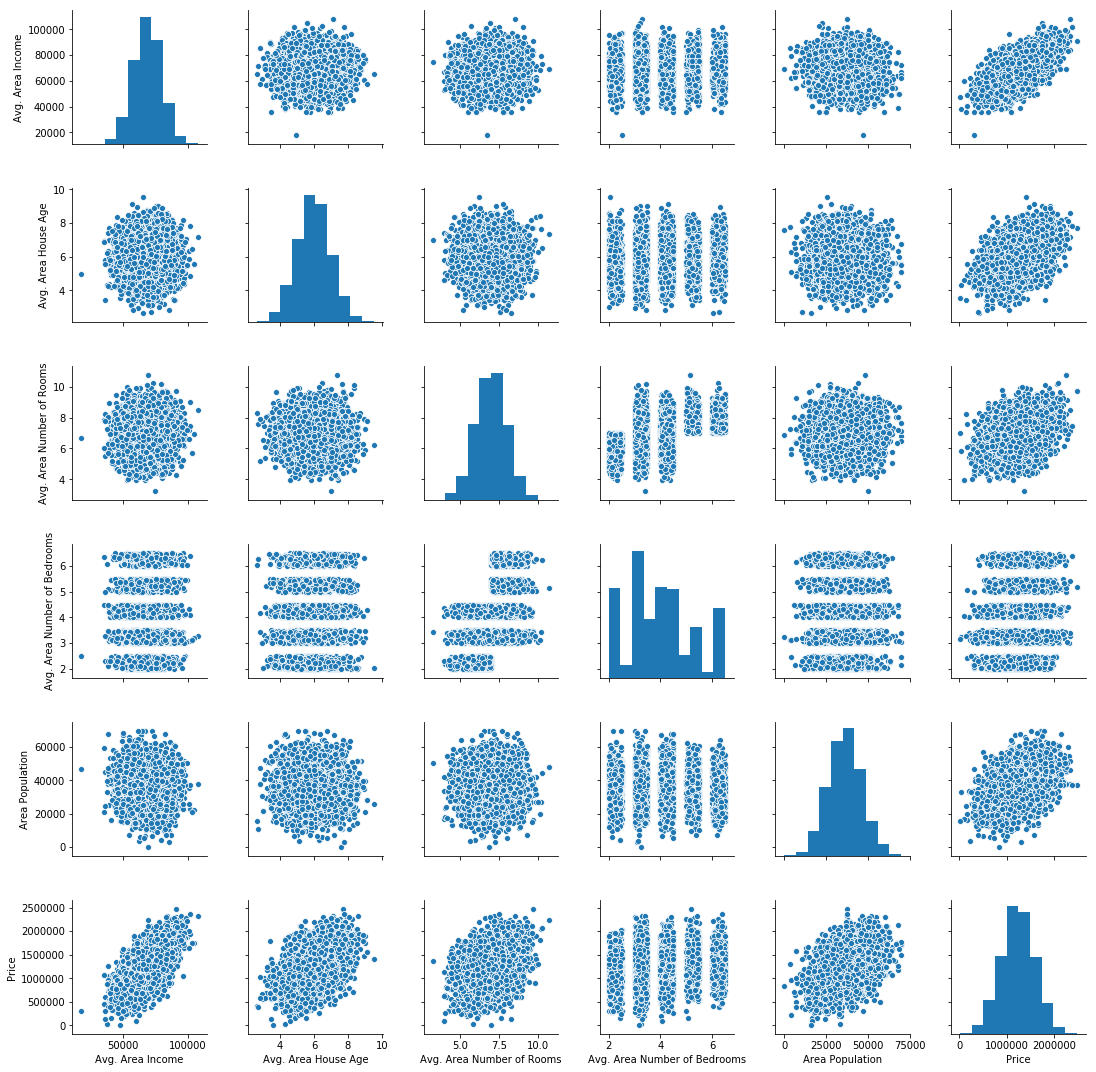

In [11]:
sns.pairplot(housing_df)

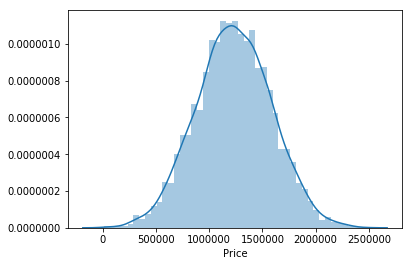

In [12]:
# Plot the distribution of price feature
sns.distplot(housing_df['Price'])

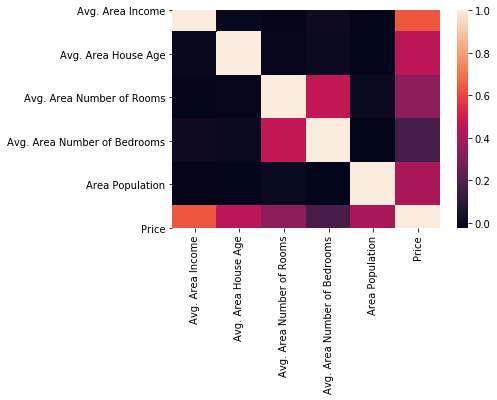

In [51]:
sns.heatmap(housing_df.corr())

## Fill missing values in columns

In [53]:
housing_num = housing_df.select_dtypes('float64')

In [54]:
housing_cat = housing_df.select_dtypes('object')

In [56]:
housing_cat

,Address
0,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,USS Barnett\nFPO AP 44820
4,USNS Raymond\nFPO AE 09386
...,...
4995,USNS Williams\nFPO AP 30153-7653
4996,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,USS Wallace\nFPO AE 73316


In [63]:
from sklearn.impute import SimpleImputer
imput = SimpleImputer(strategy='median')
housing_num = pd.DataFrame(data=imput.fit_transform(housing_num), columns=housing_num.columns)
housing_df = pd.concat([housing_num, housing_cat], axis=1)

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

### X and y arrays

In [65]:
X = housing_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_df['Price']

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [84]:
imput = SimpleImputer(strategy='median')

X_train_num = X_train.select_dtypes(np.number)

# Imputer on Training Set
X_train_num = imput.fit_transform(X_train_num)

## Creating and Training the Model

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [87]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [88]:
# print the intercept
print(lm.intercept_)

-2640366.138658338


In [89]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.531792
Avg. Area House Age,164910.498348
Avg. Area Number of Rooms,122145.546257
Avg. Area Number of Bedrooms,2559.948353
Area Population,15.154250


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of \$21.52 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of \$164883.28 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of \$122368.67 **.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of \$2233.80 **.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of \$15.15 **.

Does this make sense? Probably not because I made up this data. If you want real data to repeat this sort of analysis, check out the [boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [90]:
X_test = X_test.select_dtypes(np.number)
X_test = imput.transform(X_test) 
predictions = lm.predict(X_test)

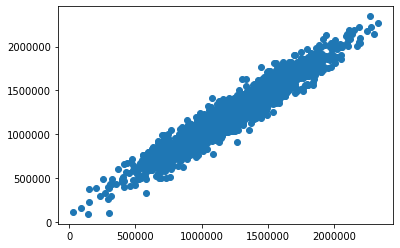

In [91]:
plt.scatter(y_test,predictions)

**Residual Histogram**

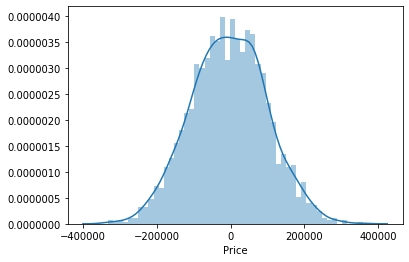

In [92]:
sns.distplot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [93]:
from sklearn import metrics

In [94]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82321.35887164203
MSE: 10464779439.92977
RMSE: 102297.50456355115


This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 

Up next is your own Machine Learning Project!

## Great Job!